In [1]:
#importing the package
import pandas as pd #for data frame
import numpy as np #maths
import matplotlib.pyplot as plt #graph
import seaborn as sns #graph
# import re
import time #time and date
# from collections import Counter
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose #decomposesion'seasonality and trend'
from statsmodels.tsa.stattools import adfuller #'test'
from statsmodels.tsa.arima_model import ARIMA #algoritham 
# from statsmodels.tsa.ar_model import AutoReg
# from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf
# from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#importing the data frame and concating
df1=pd.read_excel('E:/Documents/Alagasan/PG/Projects/Main Project/Sales DB/Retail sales.xlsx')
df2=pd.read_excel('E:/Documents/Alagasan/PG/Projects/Main Project/Sales DB/Retail sales 2.xlsx')
frame=[df1,df2]
df=pd.concat(frame)
df.head(5)

,Order Id,Sequence No,Delivery Type,Created Date,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Id,...,Discount,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected)
0,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,0.0,0.0,0.0,0.0,0.0,2.0,355.36,355.36,42.64,398.0
1,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,0.0,0.0,0.0,0.0,0.0,2.0,234.00,234.00,0.00,234.0
2,2003504,\t(No Sequence No Info Available),other,2020-01-01,06:49:00,\tcompleted,\tCompleted,Card,Mylapore Store,431,...,44.7,0.0,0.0,0.0,0.0,1.0,39.91,0.00,0.00,0.0
3,2003513,\t(No Sequence No Info Available),other,2020-01-01,07:03:00,\tcompleted,\tCompleted,Cash,Z- Pallavaram,638,...,0.0,0.0,0.0,0.0,0.0,1.0,12.46,12.46,2.24,14.7
4,2003517,\t(No Sequence No Info Available),other,2020-01-01,07:09:00,\tcompleted,\tCompleted,Cash,Selaiyur Store,433,...,0.0,0.0,0.0,0.0,0.0,1.0,98.10,98.10,4.90,103.0


In [3]:
df.shape

(1246984, 52)

In [4]:
#describing the numerical values
df.describe()

,Order Id,Phone Number,SKU,MRP,Unit Selling Price,Quantity,CESS 12%,CGST 14%,CGST 2.5%,CGST 6%,...,Discount,Sales Return/Refunded Qty,Sales Return/Refunded Amount,Sales Return/Refunded Tax,Sales Returns/Total Refunds,Items Sold,Gross Sales,Net Sales(Gross Sales - Sales Return/Refunded Amount - Discounted Amount),Net Tax Collected(Total Tax - Discounted Tax - Sales Return/Refunded Tax),Net Total(Net Sales + Net Tax Collected)
count,1.246984e+06,1.610600e+04,1.246977e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,...,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06,1.246984e+06
mean,2.499588e+06,9.240458e+09,1.236910e+05,5.886790e+01,6.128735e+01,9.780666e-01,1.029989e-02,1.221835e-02,9.298584e-02,1.032198e-01,...,2.871198e-01,2.180845e-03,1.396196e-01,2.168753e-04,1.398365e-01,9.758858e-01,4.773267e+01,4.733916e+01,8.503624e-01,4.998313e+01
std,2.146642e+05,8.323990e+08,9.629060e+04,7.486572e+01,7.407572e+01,1.454583e+00,2.361659e-01,2.847591e-01,7.101111e-01,1.200424e+00,...,6.545870e+00,1.787279e-01,1.194493e+01,1.261266e-01,1.195330e+01,1.443083e+00,2.047477e+02,2.042970e+02,5.089622e+00,2.052047e+02
min,2.003504e+06,6.245896e+09,1.815000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.220446e-16,0.000000e+00,-3.000000e+02,0.000000e+00,0.000000e+00
25%,2.342731e+06,8.980674e+09,1.001780e+05,9.000000e+00,2.500000e+01,4.550000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e-01,1.475000e+01,1.450000e+01,0.000000e+00,1.600000e+01
50%,2.580116e+06,9.551536e+09,1.002600e+05,4.000000e+01,4.250000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.900000e+01,2.880000e+01,0.000000e+00,3.088000e+01
75%,2.661126e+06,9.841626e+09,1.004140e+05,7.800000e+01,7.200000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.600000e+01,5.600000e+01,0.000000e+00,5.800000e+01
max,3.233248e+06,9.999235e+09,9.619001e+07,3.999000e+03,4.080000e+03,6.400000e+02,4.123000e+01,4.825910e+01,8.820560e+01,5.571400e+02,...,1.749000e+03,1.590000e+02,1.128900e+04,1.295200e+02,1.128900e+04,6.400000e+02,1.536000e+05,1.536000e+05,2.354470e+03,1.536000e+05


In [5]:
df.describe(include='object')
# unique tells total type of data
# top tells top data which is repeated often
# feq tells number of top data

,Sequence No,Delivery Type,Created Time,Order Status,Order Item Status,Payment Type,Location Name,Employee Id,Employee Name,Customer Name,Customer Code,TRN/GSTIN,Item Name,Variation Name,Category,HSN,Unit Of Measure,Tax Rate %
count,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,1246984,251866,1246984,1246984
unique,25640,1,1332,3,3,14,11,44,44,1119,50,1,3713,3494,20,346,3,11
top,\t(No Sequence No Info Available),other,11:25:00,\tcompleted,\tCompleted,Cash,Neelankarai Store,,(No Employee Name),\t(No Customer Specified),(No Customer Code),,Tomato -Naattu Thakkalli,Tomato -Naattu Thakkalli,Vegetables,4012000,weight,\t0 %
freq,412508,1246984,2782,1099690,1242537,431498,248274,259578,259578,1230891,1244338,1246984,47581,47582,788280,23434,828054,1095648


In [6]:
#Checking for missing values in date sequence
pd.date_range(start='2020-01-01',end='2020-06-30').difference(df.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=182, freq=None)

In [7]:
#sorting date
df=df.sort_values(by=['Created Date'])

In [8]:
#Checking for null value in gross sales column and Created Date column
df.isnull().sum()

Order Id                                                                           0
Sequence No                                                                        0
Delivery Type                                                                      0
Created Date                                                                       0
Created Time                                                                       0
Order Status                                                                       0
Order Item Status                                                                  0
Payment Type                                                                       0
Location Name                                                                      0
Employee Id                                                                        0
Employee Name                                                                      0
Customer Name                                                    

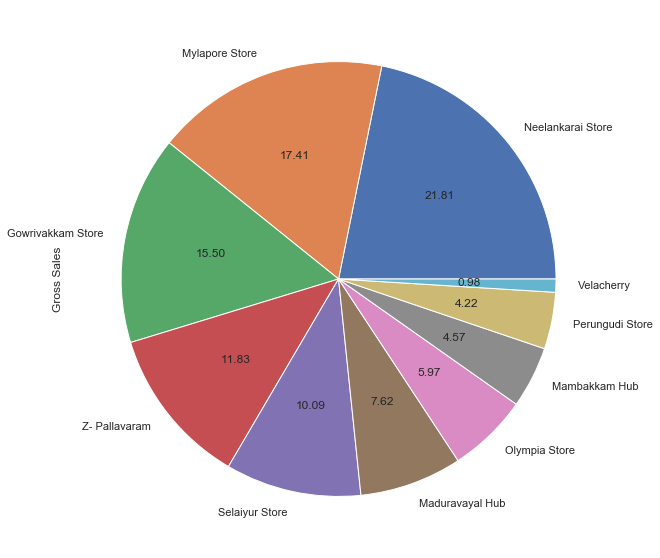

In [9]:
#top 10 location wise data
plt.subplots(figsize=(10,10))
df.groupby('Location Name')['Gross Sales'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%.2f')

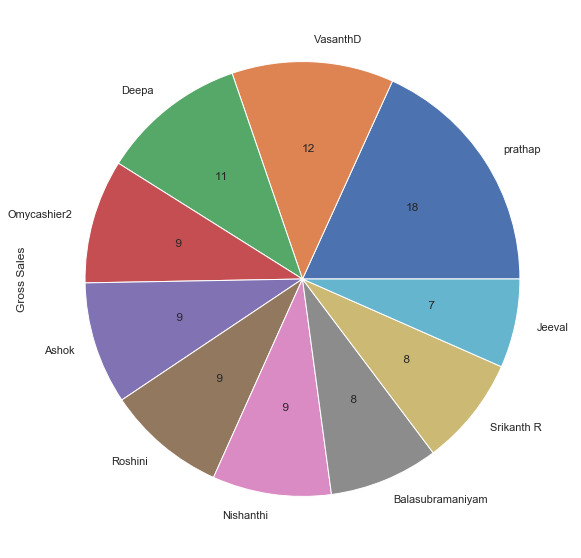

In [10]:
plt.subplots(figsize=(10,10))
df[df['Employee Name']!='(No Employee Name)'].groupby('Employee Name')['Gross Sales'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%2.f')

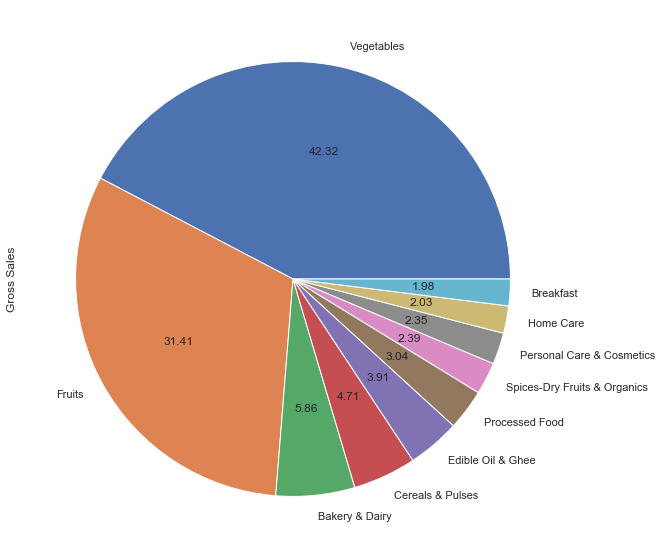

In [11]:
plt.subplots(figsize=(10,10))
df.groupby('Category')['Gross Sales'].sum().sort_values(ascending=False).head(10).plot(kind='pie',autopct='%.2f')

In [12]:
# ploting correlation heat map for all numerical items
imp_df=df[["MRP","Unit Selling Price","Quantity",'Discount',
 'Sales Return/Refunded Qty',
 'Sales Return/Refunded Amount',
 'Sales Return/Refunded Tax',
 'Sales Returns/Total Refunds',
 'Items Sold',
 'Gross Sales',
 'Net Total(Net Sales + Net Tax Collected)']]

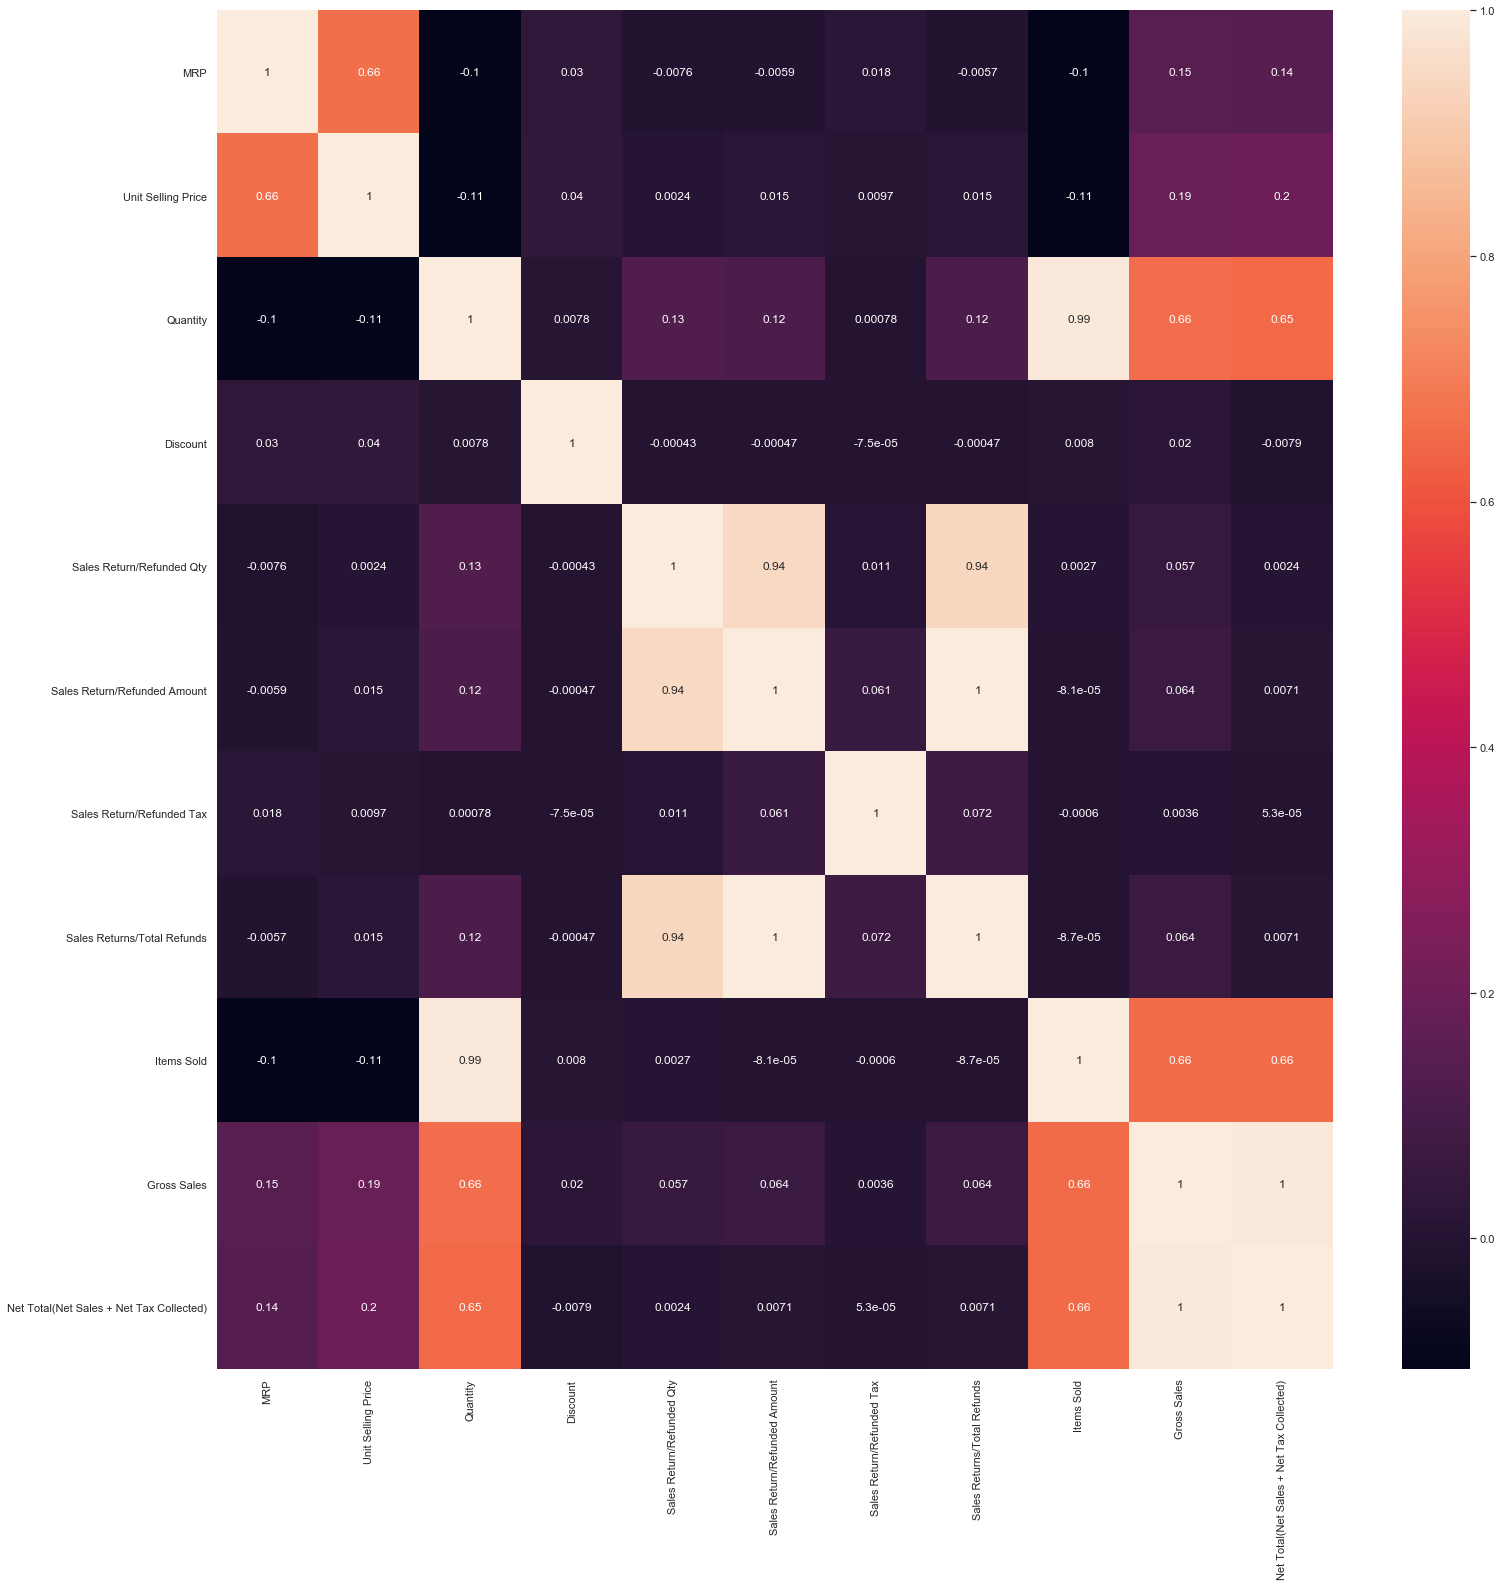

In [13]:
plt.subplots(figsize=(25,25))
sns.heatmap(imp_df.corr(),annot=True)

In [14]:
df["Created_month"]=df["Created Date"].dt.month_name()

In [15]:
df["Created_week"] = df["Created Date"].dt.week

In [16]:
df.groupby(by=['Created_week'],as_index=False)['Gross Sales'].count()

,Created_week,Gross Sales
0,1,38136
1,2,52173
2,3,38364
3,4,42033
4,5,42847
5,6,49555
6,7,45353
7,8,48877
8,9,43462
9,10,47855


In [17]:
# Removing 27th week because there is not enough data points
df = df[df.Created_week!=27]

In [18]:
df.groupby(by=['Created_week'],as_index=False)['Gross Sales'].count()

,Created_week,Gross Sales
0,1,38136
1,2,52173
2,3,38364
3,4,42033
4,5,42847
5,6,49555
6,7,45353
7,8,48877
8,9,43462
9,10,47855


In [19]:
dft = df.groupby(by=['Created_week'],as_index=False)['Gross Sales'].sum()

In [20]:
dft = dft.set_index("Created_week")

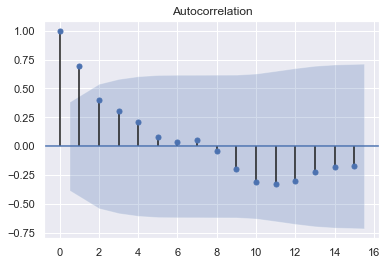

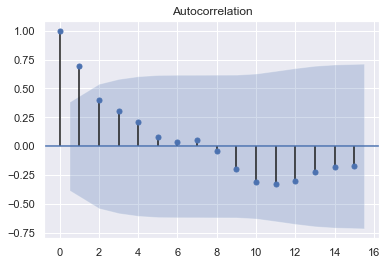

In [21]:
# Checking auto-correlation
plot_acf(dft)

Text(0.5, 1.0, 'Total Gross Sales')

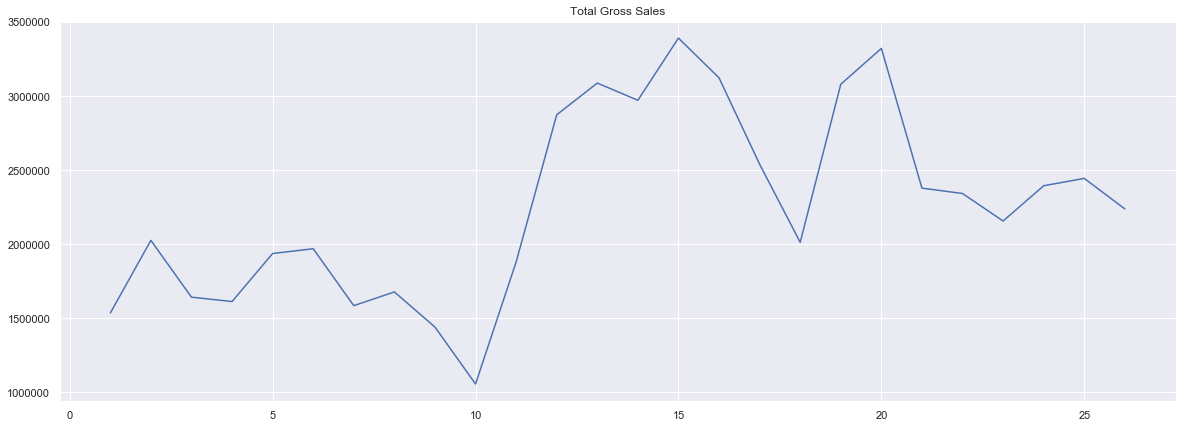

In [22]:
plt.subplots(figsize=(20,7))
plt.plot(dft["Gross Sales"])
plt.title("Total Gross Sales")

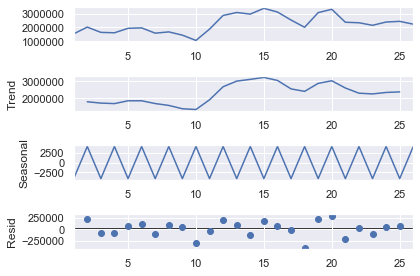

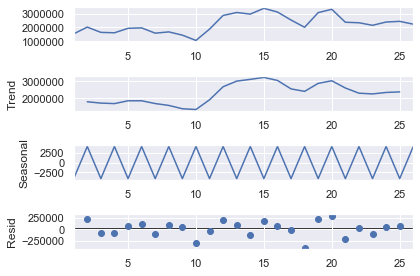

In [23]:
splot=seasonal_decompose(dft,model='additive',freq=2)
splot.plot()

In [24]:
def rolling_statistics(dataframe):
    (plt.subplots(figsize=(20,7)))
    (plt.plot(dft.rolling(window=6).mean(),color='b',label='Mean'))
    (plt.plot(dft.rolling(window=6).std(),color='r',label='Standard deviation'))
    (plt.legend(loc='best'))
    (plt.xlabel("Week",color='k'))
    (plt.ylabel("Commercial TON",color='k'))
    plt.title("Rolling test statistics")

In [25]:
def adf(dataframe_column):
    df_test = adfuller(dataframe_column,autolag='AIC')
    print("P-value for ADF test- ",df_test[1])
    if df_test[1] > 0.05:
        print("The data is not stationery")
    else:
        print("The data is stationery")

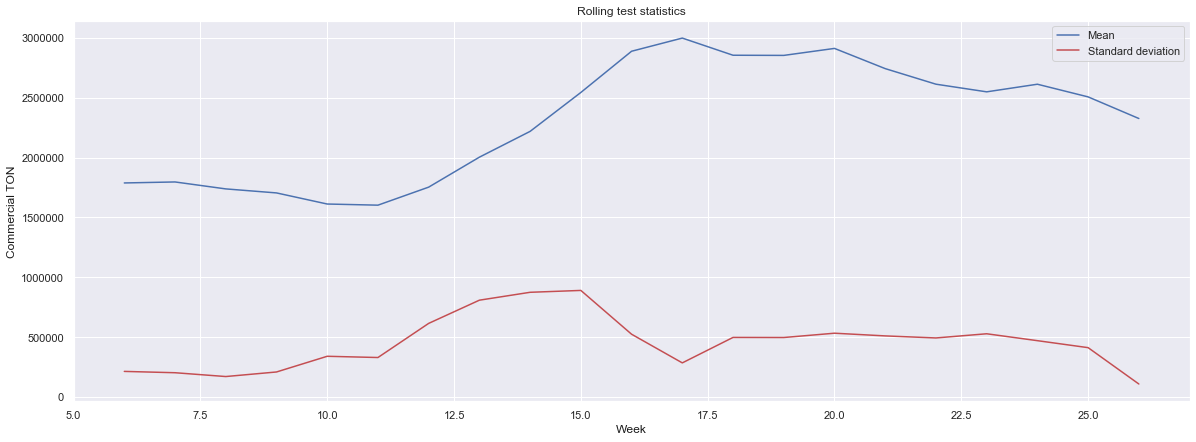

In [26]:
rolling_statistics(dft)

In [27]:
print("There is variance, data does not look stationery")

There is variance, data does not look stationery


In [28]:
adf(dft['Gross Sales'])

P-value for ADF test-  0.22691082677472596
The data is not stationery


In [29]:
# Below steps to make data stationery, this process is know as decomposing the data

In [30]:
def transformation(dataframe_column):
    return np.log(dataframe_column)

In [31]:
# Taking log will reduce the diffrence between the data point
dft_logged = transformation(dft)
dft_logged

,Gross Sales
Created_week,
1,14.244703
2,14.521769
3,14.312056
4,14.294041
5,14.477035
6,14.493514
7,14.276624
8,14.333406
9,14.181163


In [32]:
adf(dft_logged['Gross Sales'])

P-value for ADF test-  0.44873826797603167
The data is not stationery


In [33]:
# Differencing will make first week data 'nan - not a number'
dft_diff = dft_logged.diff(axis = 0, periods = 1).dropna()
dft_diff

,Gross Sales
Created_week,
2,0.277067
3,-0.209714
4,-0.018015
5,0.182994
6,0.016479
7,-0.216890
8,0.056782
9,-0.152243
10,-0.310166


In [34]:
adf(dft_diff['Gross Sales'])

P-value for ADF test-  6.093497993041613e-05
The data is stationery


In [35]:
dft_diff.shape

(25, 1)

In [36]:
# below steps to split data into test and train

In [37]:
df_train = dft_diff[0:20]
df_test = dft_diff[20:]

In [38]:
# below steps to find best parameters for model

In [39]:
p=i=q=range(0,5)
piq = itertools.product(p,i,q)
piq=list(piq)

In [40]:
for param in piq:
    try:
        model = ARIMA(df_train,order=param)
        results_AR = model.fit(disp=-1)
        print(param,results_AR.aic)
    except:
        continue
#checking the combination in which is error is less
#arima=it is a linera line with combination of auto regression and moving avg., it is one of the best model

(0, 0, 0) 5.3396708331527485
(0, 0, 1) 7.312666708352637
(0, 0, 2) 2.539386614444581
(0, 0, 3) 4.223227729540298
(0, 0, 4) nan
(0, 1, 0) 17.618796045718426
(0, 1, 1) 11.118514284530072
(0, 1, 2) 12.378604494088655
(0, 1, 3) 11.525403013527956
(0, 1, 4) 12.817695759727727
(0, 2, 0) 32.33896490126659
(0, 2, 1) 22.80562639567726
(0, 2, 2) 19.852078229650658
(0, 2, 3) 20.43878043136875
(0, 2, 4) 21.154230528577934
(1, 0, 0) 7.338894390487781
(1, 0, 1) 7.763742197915867
(1, 0, 2) 4.309225290038533
(1, 0, 3) 4.692296867390979
(1, 1, 0) 18.79515898334452
(1, 1, 1) 13.018518710245125
(1, 1, 2) 13.333493587583554
(1, 1, 3) 13.002835001015796
(1, 1, 4) 13.381787942186776
(1, 2, 0) 31.903965472999896
(2, 0, 0) 5.008300142497575
(2, 0, 1) 6.479871558817003
(2, 0, 2) 6.2147023321388986
(2, 0, 3) 6.394494916132146
(2, 0, 4) 8.239760384719773
(2, 1, 0) 12.481396665784942
(2, 1, 1) 11.611987098694001
(2, 1, 2) 12.951960196369697
(2, 1, 3) 13.76488495455758
(2, 1, 4) 14.990055518369402
(2, 2, 0) 25.344

In [41]:
# below we are fitting the model

In [42]:
model = ARIMA(df_train,order=(4, 0, 1))
results_AR = model.fit()
print(param,results_AR.aic)

#using 4,4,4 bcz is fits the model

(4, 4, 4) 5.275447678012824


In [43]:
print("Printing predictions")
results_AR.predict(start=20,end=27)

Printing predictions


20    0.207931
21    0.282272
22   -0.112820
23    0.011319
24    0.184640
25   -0.021826
26   -0.059695
27    0.097043
dtype: float64

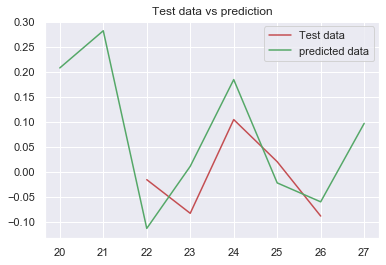

In [44]:
plt.plot(df_test,color="r")
plt.plot(results_AR.predict(start=20,end=27),color='g')
plt.title("Test data vs prediction")
plt.legend(["Test data", "predicted data"], loc ="top right")

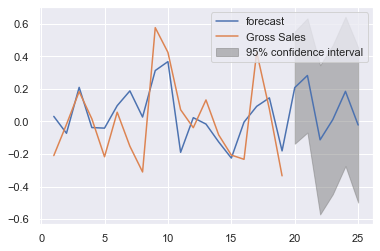

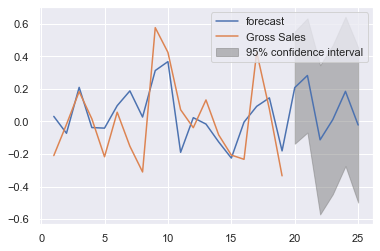

In [45]:
results_AR.plot_predict(1,25)

In [46]:
# Following code normalizes the test data (predicted data)

In [47]:
cols = dft_logged.columns
x = []
for col in cols:
    diff_results = dft_logged[col] + results_AR.predict(start=1,end=26).shift(-1)
    x.append(diff_results)
diff_df_inverted = pd.concat(x, axis=1)

In [48]:
predicted_dataframe = np.exp(diff_df_inverted[:-1]).astype(str)

In [49]:
predicted_dataframe = predicted_dataframe.rename(columns={0:"Gross Sales"})

In [50]:
predicted_dataframe['Gross Sales'] = predicted_dataframe['Gross Sales'].str.split(".",expand=True)[0]

In [51]:
predicted_dataframe[21:]

,Gross Sales
Created_week,
22,2369489
23,2594461
24,2343445
25,2303169


In [ ]:
#out put is generated above